In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
from seaborn import pairplot
from seaborn import heatmap
import matplotlib.pyplot as plt

In [3]:
train_data_orig = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data_orig = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data_orig

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# EDA

In [5]:
train_data_orig.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
train_data_orig.Survived.agg(['count', 'mean'])

count    891.000000
mean       0.383838
Name: Survived, dtype: float64

In [7]:
train_data_orig.groupby('Sex').Survived.agg(['count', 'mean'])

count      mean
Sex                    
female    314  0.742038
male      577  0.188908

In [8]:
train_data_orig['Age_is_null'] = train_data_orig['Age'].isna()
train_data_orig.groupby('Age_is_null').Survived.agg(['count', 'mean'])

count      mean
Age_is_null                 
False          714  0.406162
True           177  0.293785

In [9]:
train_data_orig['Cabin_is_null'] = train_data_orig['Cabin'].isna()
train_data_orig.groupby('Cabin_is_null').Survived.agg(['count', 'mean'])

count      mean
Cabin_is_null                 
False            204  0.666667
True             687  0.299854

In [10]:
train_data_orig.groupby('Pclass').Survived.agg(['count', 'mean'])

count      mean
Pclass                 
1         216  0.629630
2         184  0.472826
3         491  0.242363

In [11]:
train_data_orig.groupby('SibSp').Survived.agg(['count', 'mean'])

count      mean
SibSp                 
0        608  0.345395
1        209  0.535885
2         28  0.464286
3         16  0.250000
4         18  0.166667
5          5  0.000000
8          7  0.000000

In [12]:
train_data_orig['SibSp_new'] = train_data_orig['SibSp'].apply(lambda x: x if x in [0, 1] else '>1')
train_data_orig['SibSp_new'] = train_data_orig['SibSp_new'].astype(str)
train_data_orig.groupby('SibSp_new').Survived.agg(['count', 'mean'])

count      mean
SibSp_new                 
0            608  0.345395
1            209  0.535885
>1            74  0.270270

In [13]:
train_data_orig.groupby('Parch').Survived.agg(['count', 'mean'])

count      mean
Parch                 
0        678  0.343658
1        118  0.550847
2         80  0.500000
3          5  0.600000
4          4  0.000000
5          5  0.200000
6          1  0.000000

In [14]:
train_data_orig['Parch_new'] = train_data_orig['Parch'].apply(lambda x: x if x in [0, 1] else '>1')
train_data_orig['Parch_new'] = train_data_orig['Parch_new'].astype(str)
train_data_orig.groupby('Parch_new').Survived.agg(['count', 'mean'])

count      mean
Parch_new                 
0            678  0.343658
1            118  0.550847
>1            95  0.463158

In [15]:
train_data_orig['Family'] = train_data_orig['SibSp'] + train_data_orig['Parch']
train_data_orig.groupby('Family').Survived.agg(['count', 'mean'])

count      mean
Family                 
0         537  0.303538
1         161  0.552795
2         102  0.578431
3          29  0.724138
4          15  0.200000
5          22  0.136364
6          12  0.333333
7           6  0.000000
10          7  0.000000

In [16]:
train_data_orig['Family_new'] = train_data_orig['Family'].apply(lambda x: x if x in [0, 1, 2] else '>2')
train_data_orig['Family_new'] = train_data_orig['Family_new'].astype(str)
train_data_orig.groupby('Family_new').Survived.agg(['count', 'mean'])

count      mean
Family_new                 
0             537  0.303538
1             161  0.552795
2             102  0.578431
>2             91  0.340659

In [17]:
train_data_orig.groupby('Embarked', dropna=False).Survived.agg(['count', 'mean'])

count      mean
Embarked                 
C           168  0.553571
Q            77  0.389610
S           644  0.336957
NaN           2  1.000000

In [18]:
train_data_orig['Age_bin'] = pd.qcut(train_data_orig['Age'], 5)
train_data_orig.groupby('Age_bin', dropna=False).Survived.agg(['count', 'mean'])

count      mean
Age_bin                       
(0.419, 19.0]    164  0.481707
(19.0, 25.0]     137  0.328467
(25.0, 31.8]     127  0.393701
(31.8, 41.0]     144  0.437500
(41.0, 80.0]     142  0.373239

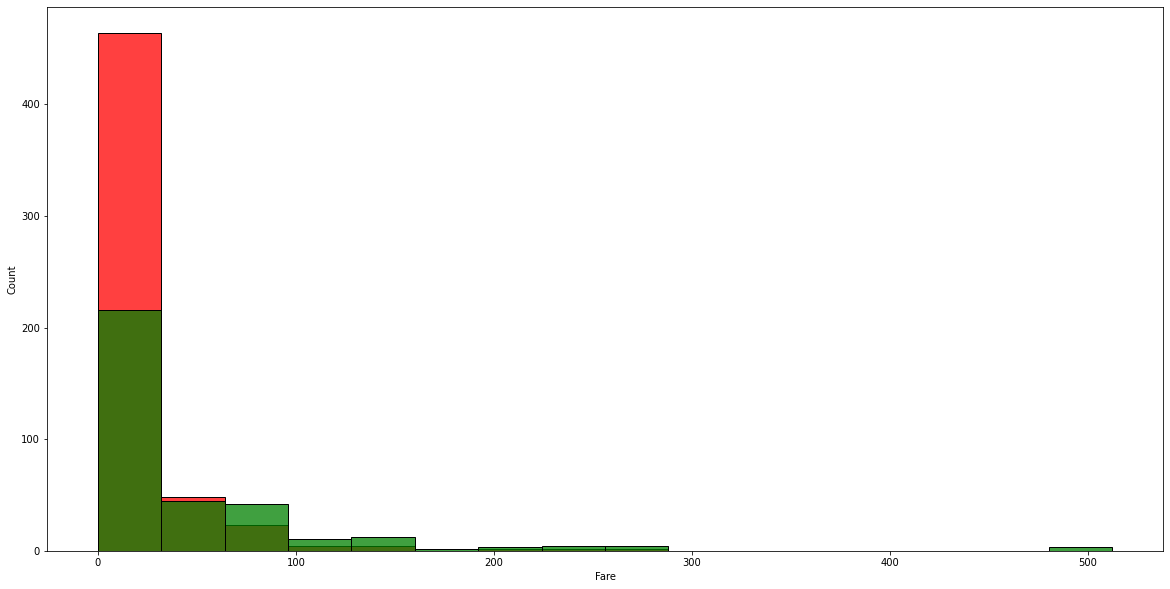

In [19]:
for i in ['Age', 'Fare']:
    died = train_data_orig[train_data_orig['Survived'] == 0][i]
    survived = train_data_orig[train_data_orig['Survived'] == 1][i]
    xmin = min(list(died) + list(survived))
    xmax = max(list(died) + list(survived))
    plt.figure(figsize = (20,10))
    sns.histplot(died, color = 'r', bins = np.linspace(0, xmax, 17))
    sns.histplot(survived, color = 'g', bins = np.linspace(0, xmax, 17))
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
def scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(f'accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'roc_auc: {roc_auc_score(y_true, y_pred)}')

# Data pre-processing pipeline

In [22]:
class AgeImputerByName(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.age_median_for_each_name = None
    
    @staticmethod
    def Name_cut_for_data(X):
        X = X.copy()
        X['Name_cut'] = X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        X['Name_cut'] = X['Name_cut'].apply(lambda x : x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Other')
        return X
    
    def fit(self, X, y=None):
        X = X.copy()
        X = self.Name_cut_for_data(X)
        self.age_median_for_each_name = X.groupby('Name_cut').Age.median()
        return self

    def transform(self, X):
        X = X.copy()
        X = self.Name_cut_for_data(X)
        X = X.merge(self.age_median_for_each_name, how='left',on='Name_cut', suffixes=(None,'_median_for_each_name'))
        X['Age'] = X.Age.fillna(X.Age_median_for_each_name)
        return X[['Age']]

In [23]:
class FareImputerByPclass(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.fare_median_for_each_pclass = None
        
    def fit(self, X, y=None):
        X = X.copy()
        self.fare_median_for_each_pclass = X.groupby('Pclass').Fare.median()
        return self

    def transform(self, X):
        X = X.copy()
        X = X.merge(self.fare_median_for_each_pclass, how='left',on='Pclass', suffixes=(None,'_median_for_each_pclass'))
        X['Fare'] = X.Fare.fillna(X.Fare_median_for_each_pclass)
        return X[['Fare']]

In [24]:
class FamilyBins(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Family'] = X['SibSp'] + X['Parch']
        X['Family_bins'] = X['Family'].apply(lambda x: x if x in [0, 1, 2] else '>2')
        X['Family_bins'] = X['Family_bins'].astype(str)
        return X[['Family_bins']]

In [25]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.col_of_X = None
        
    def get_feature_names_out(self):
        return self.col_of_X
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(columns=self.columns)
        self.col_of_X = X.columns
        return X

In [26]:
class NewOneHotEncoder(OneHotEncoder):
    def transform(self, X):
        X = super().transform(X)
        X = pd.DataFrame(X, columns=super().get_feature_names_out())
        return X

In [27]:
age_pipe = Pipeline([
    ('imputer', AgeImputerByName()),
    ('std_scaler', StandardScaler()),
])

In [28]:
fare_pipe = Pipeline([
    ('imputer', FareImputerByPclass()),
    ('std_scaler', StandardScaler()),
])

In [29]:
miss_ind_pipe = Pipeline([
    ('imputer', MissingIndicator(features='all', sparse=False)),
])

In [30]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent',)),
    ('onehot', NewOneHotEncoder(handle_unknown="ignore", sparse=False,)),
    ('drop', DropFeatures(['x1_Q', 'x0_male'])),
])

In [31]:
family_pipe = Pipeline([
    ('family', FamilyBins()),
    ('onehot', NewOneHotEncoder(handle_unknown="ignore", sparse=False,)),
    #('drop', DropFeatures(['Family_bins_0', 'Family_bins_1'])),
])

In [32]:
pclass_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [33]:
data_pipe = ColumnTransformer([
    ('age', age_pipe, ['Age', 'Name']),
    ('Pclass', pclass_pipe, ['Pclass']),
    #('fare', fare_pipe, ['Fare', 'Pclass']),
    ('family', family_pipe, ['SibSp', 'Parch']),
    ('cat', cat_pipe, ['Sex', 'Embarked']),
    ('miss_ind', miss_ind_pipe, ['Cabin']),
])

# Full pipeline with model

In [34]:
model_pipe = Pipeline([
    ('data', data_pipe),
    #('model', LogisticRegression(random_state=1, penalty="l1", solver="liblinear",)),
    ('model', RandomForestClassifier(random_state=1, max_depth=4, max_features = 5, n_estimators=100)),
])

In [35]:
X = train_data_orig.drop(columns=['Survived'])
y = train_data_orig.Survived

In [36]:
model_pipe.fit(X, y)

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   AgeImputerByName()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Name']),
                                                 ('Pclass',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass']),
                                                 ('family',
                                                  Pipeline(steps=[('family',
                                                                   FamilyBins()),
    

In [37]:
name_of_columns = []
for i in range(len(model_pipe[0].transformers_) - 1):
    try:
        name_of_columns += list(model_pipe[0].transformers_[i][1][-1].get_feature_names_out())
    except:
        name_of_columns += list(model_pipe[0].transformers_[i][1][-1].feature_names_in_)

pd.DataFrame(model_pipe[0].transform(X), index=X.index, columns=name_of_columns)

Age    Pclass  Family_bins_0  Family_bins_1  Family_bins_2  \
0   -0.557365  0.827377            0.0            1.0            0.0   
1    0.649713 -1.566107            0.0            1.0            0.0   
2   -0.255596  0.827377            1.0            0.0            0.0   
3    0.423386 -1.566107            0.0            1.0            0.0   
4    0.423386  0.827377            1.0            0.0            0.0   
..        ...       ...            ...            ...            ...   
886 -0.180153 -0.369365            1.0            0.0            0.0   
887 -0.783692 -1.566107            1.0            0.0            0.0   
888 -0.632808  0.827377            0.0            0.0            0.0   
889 -0.255596 -1.566107            1.0            0.0            0.0   
890  0.197059  0.827377            1.0            0.0            0.0   

     Family_bins_>2  x0_female  x1_C  x1_S  Cabin  
0               0.0        0.0   0.0   1.0    1.0  
1               0.0        1.0   1.0   0.0    0.0  
2               0.0        1.0   0.0   1.0    1.0  
3               0.0        1.0   0.0   1.0    0.0  
4               0.0        0.0   0.0   1.0    1.0  
..              ...        ...   ...   ...    ...  
886             0.0        0.0   0.0   1.0    1.0  
887             0.0        1.0   0.0   1.0    0.0  
888             1.0        1.0   0.0   1.0    1.0  
889             0.0        0.0   1.0   0.0    0.0  
890             0.0        0.0   0.0   0.0    1.0  

[891 rows x 10 columns]

In [38]:
#pd.DataFrame(model_pipe[1].coef_, columns=name_of_columns)

In [39]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1,)

metrics = ['accuracy', 'roc_auc', 'f1']

In [40]:
cv_res = cross_validate(model_pipe, X, y, scoring=metrics, cv=cv, verbose=0, )
for i in cv_res:
    print(f'{i}_score: mean: {cv_res[i].mean()}, std: {cv_res[i].std()}')

fit_time_score: mean: 0.19479523181915284, std: 0.004101624531737279
score_time_score: mean: 0.06768392562866211, std: 0.0014769941487937945
test_accuracy_score: mean: 0.8206641139915887, std: 0.02659496943431779
test_roc_auc_score: mean: 0.8628312054233883, std: 0.02944369021227318
test_f1_score: mean: 0.7375452452324303, std: 0.04571598836928147


In [41]:
hyperparamsL = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'model__C': [0.1, 0.3, 0.5, 0.7, 1],
}

In [42]:
hyperparamsR = {
    'model__n_estimators': [25, 50, 100, 150, 200, 500, 1000],
    #'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    #'model__max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

In [43]:
best_params_for_LogR = {'model__C': [1]}
best_params_for_RF = {'model__max_depth': [4], 'model__max_features': [5], 'model__n_estimators': [100]}

In [44]:
cross_val = GridSearchCV(model_pipe, hyperparamsR, scoring=metrics, refit='accuracy', cv=5, verbose=0, return_train_score=True,)

In [45]:
cross_val.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data',
                                        ColumnTransformer(transformers=[('age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          AgeImputerByName()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Name']),
                                                                        ('Pclass',
                                                                         Pipeline(steps=[('std_scaler',
                                                                          

In [46]:
for i in cross_val.cv_results_:
    if 'split' not in i:
        print(i, cross_val.cv_results_[i])

mean_fit_time [0.07361135 0.11361165 0.19327216 0.27330866 0.36586361 0.85501308
 1.63311529]
std_fit_time [0.00137036 0.00099986 0.00160347 0.00107016 0.0086584  0.01128251
 0.02578688]
mean_score_time [0.04801016 0.05599217 0.06758785 0.08201737 0.09699512 0.17110887
 0.31600018]
std_score_time [0.00063028 0.00188081 0.00088863 0.00242741 0.00203293 0.00371932
 0.05354408]
param_model__n_estimators [25 50 100 150 200 500 1000]
params [{'model__n_estimators': 25}, {'model__n_estimators': 50}, {'model__n_estimators': 100}, {'model__n_estimators': 150}, {'model__n_estimators': 200}, {'model__n_estimators': 500}, {'model__n_estimators': 1000}]
mean_test_accuracy [0.82043814 0.82044442 0.82491369 0.8226665  0.82041931 0.81929571
 0.81929571]
std_test_accuracy [0.02091051 0.0195998  0.02287466 0.02093506 0.01710863 0.01867327
 0.02060192]
rank_test_accuracy [4 3 1 2 5 7 6]
mean_train_accuracy [0.84371464 0.84511953 0.84399712 0.84596065 0.84539925 0.84736278
 0.84624116]
std_train_accuracy

In [47]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, train_size = 0.8, stratify=y)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, train_size = 0.8, )

In [48]:
model_pipe.fit(train_X, train_y)

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   AgeImputerByName()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Name']),
                                                 ('Pclass',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass']),
                                                 ('family',
                                                  Pipeline(steps=[('family',
                                                                   FamilyBins()),
    

In [49]:
def roc_and_pr_curves(test_y, pred_y):
    fpr, tpr, thresholds = roc_curve(test_y, pred_y, )
    roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
    roc['acc'] = roc['thresholds'].apply(lambda x: accuracy_score(test_y, pred_y >= x))
    roc['f1'] = roc['thresholds'].apply(lambda x: f1_score(test_y, pred_y >= x))
    plt.figure(figsize = (15,10))
    plt.plot(roc['fpr'], roc['tpr'])
    plt.plot(roc['fpr'], roc['acc'])
    plt.plot(roc['fpr'], roc['f1'])
    sns.scatterplot(data=roc[roc['acc'] == roc['acc'].max()], x='fpr', y='acc')
    print(f"threshold for max acc: {roc[roc['acc'] == roc['acc'].max()]['thresholds'].values}")
    
    precision, recall, thresholds = precision_recall_curve(test_y, pred_y,)
    pr = pd.DataFrame({'precision':np.delete(precision, -1), 'recall':np.delete(recall, -1), 'thresholds':thresholds})
    pr['acc'] = pr['thresholds'].apply(lambda x: accuracy_score(test_y, pred_y >= x))
    pr['f1'] = pr['thresholds'].apply(lambda x: f1_score(test_y, pred_y >= x))
    plt.figure(figsize = (15,10))
    plt.plot(pr['recall'], pr['precision'])
    plt.plot(pr['recall'], pr['acc'])
    plt.plot(pr['recall'], pr['f1'])
    sns.scatterplot(data=pr[pr['acc'] == pr['acc'].max()], x='recall', y='acc')

threshold for max acc: [0.40343331]


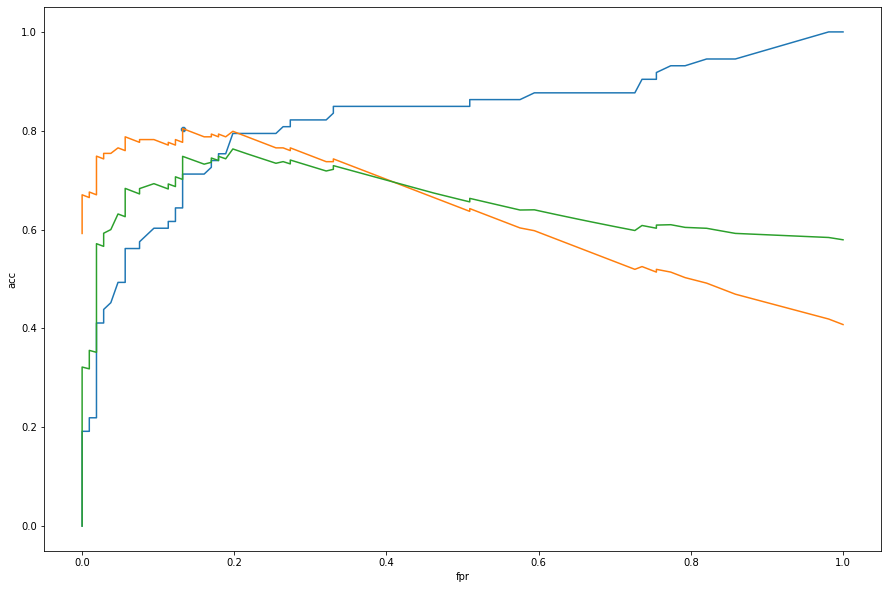

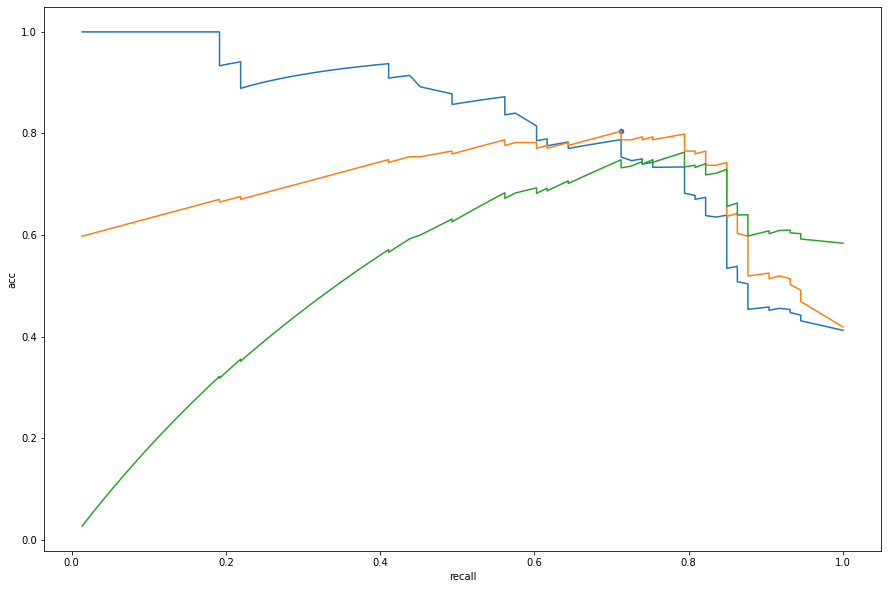

In [50]:
roc_and_pr_curves(test_y, model_pipe.predict_proba(test_X)[:,1])

In [51]:
#model = cross_val
model = model_pipe
model.fit(X,y)
#print(model.best_params_)
test_pred = model.predict_proba(test_data_orig)[:,1]
test_pred = test_pred >= 0.5
output = pd.DataFrame({'PassengerId': test_data_orig.PassengerId, 'Survived': test_pred.astype(int)})
output.to_csv('submission.csv', index=False)
pd.read_csv('./submission.csv')

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]